In [17]:
# Step 1: Load and Prepare the Dataset
import pandas as pd
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler

# Load the Wine dataset
wine = load_wine()

# Convert the data to a DataFrame for easier manipulation
df = pd.DataFrame(wine.data, columns=wine.feature_names)

# Add the target (class labels) to the DataFrame
df['target'] = wine.target

# Display basic info about the dataset
print(df.info())
print(df.head())

# Summary statistics of the features
print(df.describe())

# Class distribution
print(df['target'].value_counts())

# Standardize the dataset
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df.drop(columns=['target']))

# Check the first few rows of the scaled data
print(X_scaled[:5])


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
 13  targe

In [18]:
# Step 2: Implement K-Means Clustering
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, adjusted_rand_score

# Implement K-Means with k=3
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X_scaled)

# Get the predicted cluster labels
kmeans_labels = kmeans.labels_

# Performance metrics
silhouette = silhouette_score(X_scaled, kmeans_labels)
ari = adjusted_rand_score(wine.target, kmeans_labels)

print(f"K-Means Silhouette Score: {silhouette}")
print(f"K-Means Adjusted Rand Index: {ari}")


K-Means Silhouette Score: 0.2848589191898987
K-Means Adjusted Rand Index: 0.8974949815093207


In [19]:
pip install pyclustering


     ---------------------------------------- 0.0/2.6 MB ? eta -:--:--
     ---------------------------------------- 0.0/2.6 MB ? eta -:--:--
     -------- ------------------------------- 0.5/2.6 MB 5.3 MB/s eta 0:00:01
     -------------------- ------------------- 1.3/2.6 MB 4.6 MB/s eta 0:00:01
     -------------------------------- ------- 2.1/2.6 MB 5.4 MB/s eta 0:00:01
     -------------------------------- ------- 2.1/2.6 MB 5.4 MB/s eta 0:00:01
     ---------------------------------------- 2.6/2.6 MB 3.1 MB/s eta 0:00:00
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
  Created wheel for pyclustering: filename=pyclustering-0.10.1.2-py3-none-any.whl size=2395230 sha256=6ffff8a980c9111b7d5d94807c9b17a0c10a

In [21]:
# Step 3: Implement K-Medoids Clustering
from pyclustering.cluster.kmedoids import kmedoids
from pyclustering.utils import distance_metric, type_metric

# Choose initial medoids (randomly or based on your dataset)
initial_medoids = [0, 10, 20]  # Change these indices based on your data

# K-Medoids implementation
kmedoids_instance = kmedoids(X_scaled, initial_medoids, metric=distance_metric(type_metric.EUCLIDEAN))
kmedoids_instance.process()

# Get the predicted cluster labels (each cluster is a list of indices)
kmedoids_labels = kmedoids_instance.get_clusters()

# Convert kmedoids_labels into a flat array of cluster labels (each point belongs to one cluster)
flat_labels = [0] * len(X_scaled)  # Create an empty list to store labels
for i, cluster in enumerate(kmedoids_labels):
    for index in cluster:
        flat_labels[index] = i  # Assign the cluster index to the corresponding points

# Performance metrics for K-Medoids
silhouette_kmedoids = silhouette_score(X_scaled, flat_labels)
ari_kmedoids = adjusted_rand_score(wine.target, flat_labels)

print(f"K-Medoids Silhouette Score: {silhouette_kmedoids}")
print(f"K-Medoids Adjusted Rand Index: {ari_kmedoids}")



K-Medoids Silhouette Score: 0.26597740204536796
K-Medoids Adjusted Rand Index: 0.7263406645756675


ValueError: 'c' argument must be a color, a sequence of colors, or a sequence of numbers, not [[59, 60, 61, 62, 64, 66, 67, 68, 70, 72, 75, 76, 77, 78, 80, 81, 82, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 97, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 111, 112, 113, 114, 115, 116, 117, 118, 119, 123, 125, 126, 127, 128, 129], [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 63, 65, 69, 71, 73, 74, 79, 95, 98, 109, 110, 120, 121, 124], [83, 96, 122, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177]]

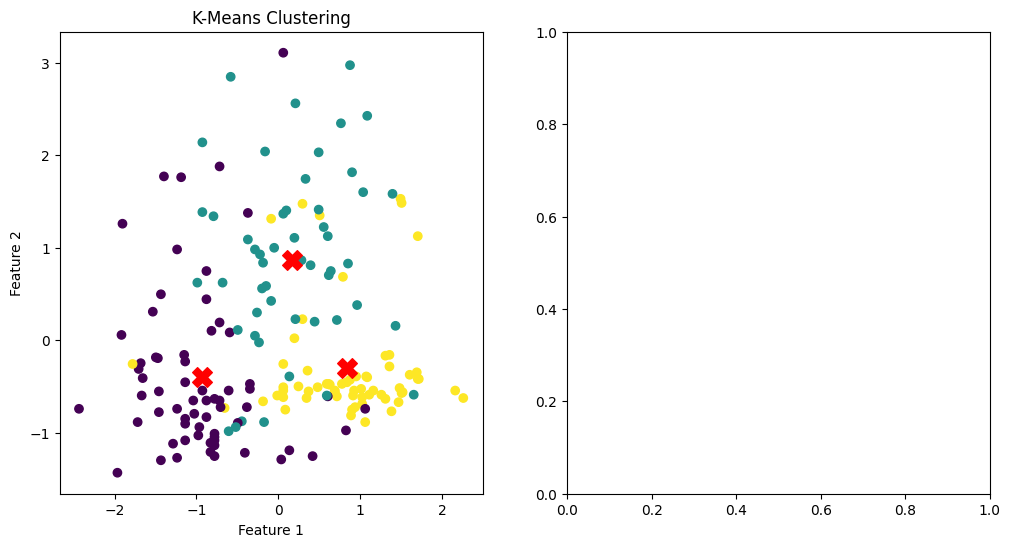

In [22]:
# Step 4: Visualize and Compare Results
import matplotlib.pyplot as plt

# K-Means visualization
plt.figure(figsize=(12, 6))

# K-Means plot
plt.subplot(1, 2, 1)
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=kmeans_labels, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='red', marker='X')
plt.title('K-Means Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

# K-Medoids plot
plt.subplot(1, 2, 2)
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=kmedoids_labels, cmap='viridis')
# Mark the K-Medoids centers (first point in each cluster)
medoids_x = [X_scaled[medoid][0] for medoid in initial_medoids]
medoids_y = [X_scaled[medoid][1] for medoid in initial_medoids]
plt.scatter(medoids_x, medoids_y, s=200, c='red', marker='X')
plt.title('K-Medoids Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

plt.tight_layout()
plt.show()
